# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train) / X_train.shape[0]

    # Step 2: Compute eigenvalues and eigenvectors of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 3: Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 4: Select the top n_components eigenvectors (V)
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Step 5: Use only the real part of the eigenvectors to avoid complex numbers
    top_eigenvectors = np.real(top_eigenvectors)

    # Step 6: Project the data onto the reduced feature space
    X_train_reduced = np.dot(X_train, top_eigenvectors)
    X_test_reduced = np.dot(X_test, top_eigenvectors)

    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [784, 300, 150, 50, 20]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the result
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 908.2594 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 255.8114 seconds
Applying custom SVD with 150 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9198, Training time: 94.8266 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 19.8049 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.7051 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


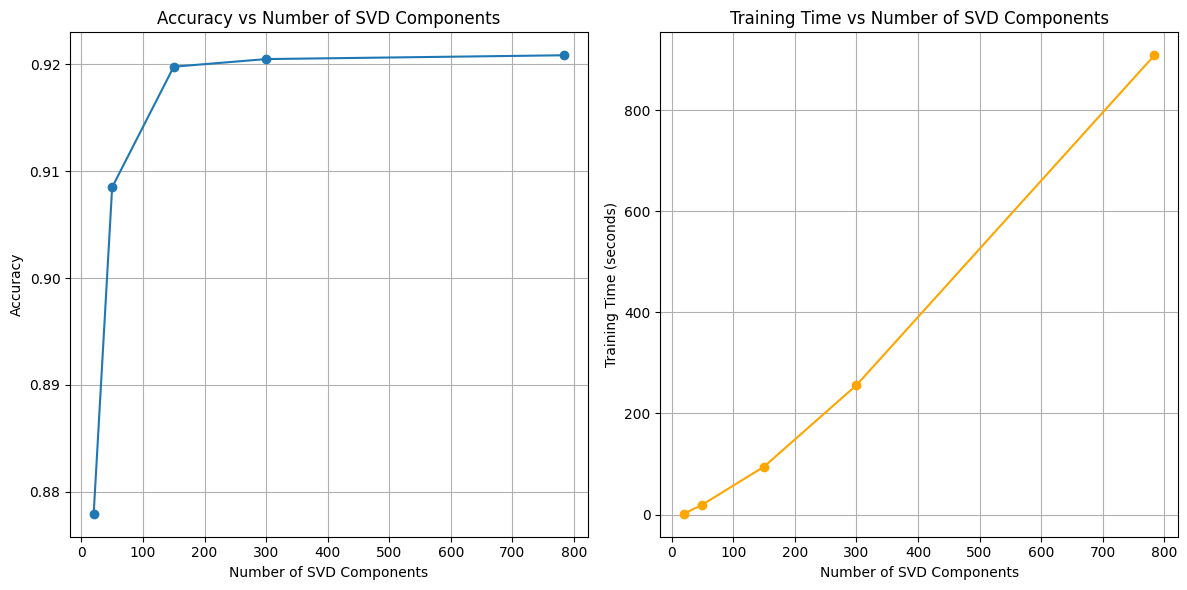

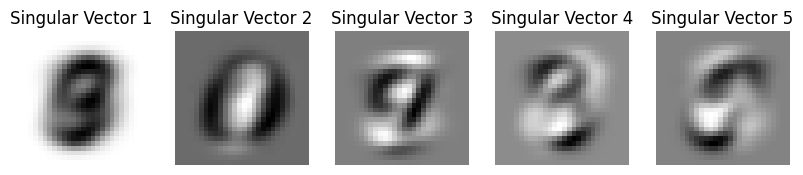

In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Plot accuracy and training time as functions of the number of SVD components
def plot_results(results):
    # Extract data from results
    n_components = [res['n_components'] for res in results]
    accuracies = [res['accuracy'] for res in results]
    training_times = [res['training_time'] for res in results]

    # Plot accuracy vs. number of SVD components
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(n_components, accuracies, marker='o')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Training time plot
    plt.subplot(1, 2, 2)
    plt.plot(n_components, training_times, marker='o', color='orange')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize top 5 singular vectors reshaped as 28x28 images
def visualize_singular_vectors(X_train, n_components):
    # Step 1: Compute the covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train) / X_train.shape[0]

    # Step 2: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 3: Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_singular_vectors = eigenvectors[:, sorted_indices[:n_components]]

    # Step 4: Use only the real part of the singular vectors and visualize
    top_singular_vectors = np.real(top_singular_vectors)

    # Reshape and plot the top 5 singular vectors (each of size 784, which is 28x28)
    plt.figure(figsize=(10, 2))
    for i in range(5):
        singular_vector_img = top_singular_vectors[:, i].reshape(28, 28)  # Reshape to 28x28 pixels
        plt.subplot(1, 5, i + 1)
        plt.imshow(singular_vector_img, cmap='gray')
        plt.title(f'Singular Vector {i + 1}')
        plt.axis('off')

    plt.show()

# Call the functions
plot_results(results)
visualize_singular_vectors(X_train, n_components=5)

## Part 6: Analyze / Conclusion

YOUR ANSWER: The results are conclusively that the higher number of SVD components means a higher accuracy. However, as we reach a higher number of SVD there is a diminishing return, up to a ceiling of a 92.09% accuracy for 784 components. The training time for SVD components on the other hand grows linearly with the number of SVD components.